# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

Normalization

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plot Images

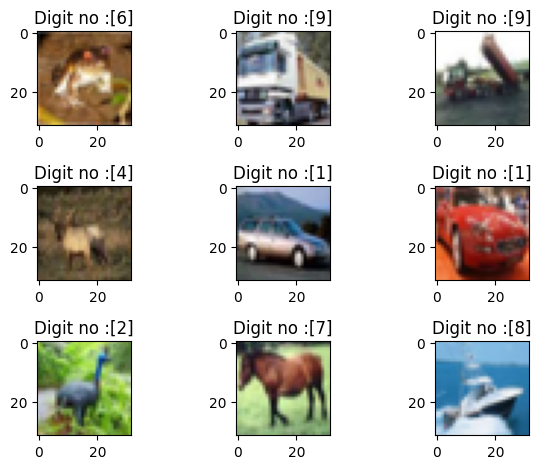

In [7]:
fig=plt.figure()
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.tight_layout()
  plt.imshow(X_train[i-1],cmap="gray")
  plt.title("Digit no :{}".format(y_train[i-1]))


Labeling Target (one hot encoding)

In [8]:
from keras.utils import np_utils
no_class=10
y_train=np_utils.to_categorical(y_train,no_class)
y_test=np_utils.to_categorical(y_test,no_class)

In [9]:
y_train.shape

(50000, 10)

# Fully connected neural network for image classification ♣















In [10]:
model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(500, activation='relu'),
        layers.Dense(250, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=5,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8730 - accuracy: 0.3250 - val_loss: 1.6879 - val_accuracy: 0.3966
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6688 - accuracy: 0.4020 - val_loss: 1.6030 - val_accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5795 - accuracy: 0.4349 - val_loss: 1.5494 - val_accuracy: 0.4491
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5326 - accuracy: 0.4539 - val_loss: 1.5536 - val_accuracy: 0.4451
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4946 - accuracy: 0.4661 - val_loss: 1.5417 - val_accuracy: 0.4466


In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

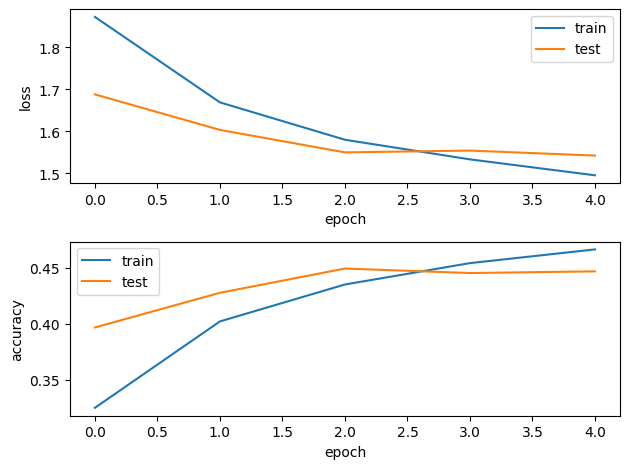

In [12]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.tight_layout()

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5417 - accuracy: 0.4466


[1.5416958332061768, 0.4465999901294708]

In [14]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred.shape

(10000, 10)

In [16]:
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

In [17]:
y_pred.shape

(10000,)

In [18]:
y_test.shape

(10000,)

In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.42      0.47      1000
           1       0.64      0.43      0.51      1000
           2       0.30      0.38      0.33      1000
           3       0.35      0.32      0.33      1000
           4       0.43      0.35      0.38      1000
           5       0.41      0.31      0.35      1000
           6       0.47      0.53      0.50      1000
           7       0.61      0.38      0.47      1000
           8       0.43      0.74      0.54      1000
           9       0.47      0.61      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000



In [20]:
cn=confusion_matrix(y_test,y_pred)

confusion_matrix

Text(0.5, 23.52222222222222, 'Predicted')

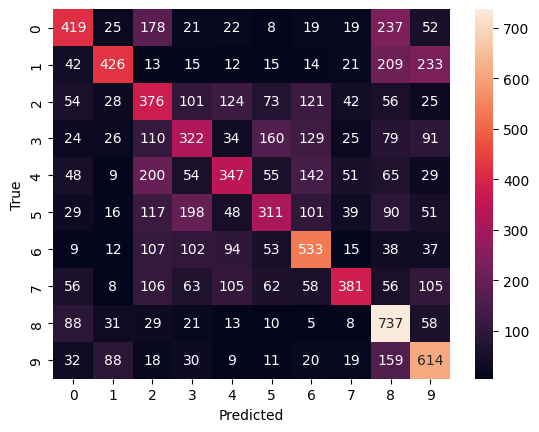

In [21]:
import seaborn as sns
sns.heatmap(cn,annot=True,fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

In [22]:
from keras.utils import np_utils
no_class=10
y_test=np_utils.to_categorical(y_test,no_class)

In [23]:
y_test.shape

(10000, 10)

In [24]:
y_train.shape

(50000, 10)

# convolution neural network for image classification ♣















In [25]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),padding='same',strides=(1,1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history=model.fit(X_train, y_train, epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 16s 6ms/step - loss: 1.6045 - accuracy: 0.4161 - val_loss: 1.2433 - val_accuracy: 0.5666
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2664 - accuracy: 0.5481 - val_loss: 1.1161 - val_accuracy: 0.6092
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1433 - accuracy: 0.5957 - val_loss: 1.0029 - val_accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0587 - accuracy: 0.6279 - val_loss: 0.9496 - val_accuracy: 0.6645
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0063 - accuracy: 0.6448 - val_loss: 0.9479 - val_accuracy: 0.6749
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9558 - accuracy: 0.6642 - val_loss: 0.9064 - val_accuracy: 0.6852
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9230 - accuracy: 0.6752 - val_loss: 0.8876 - val_accuracy

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

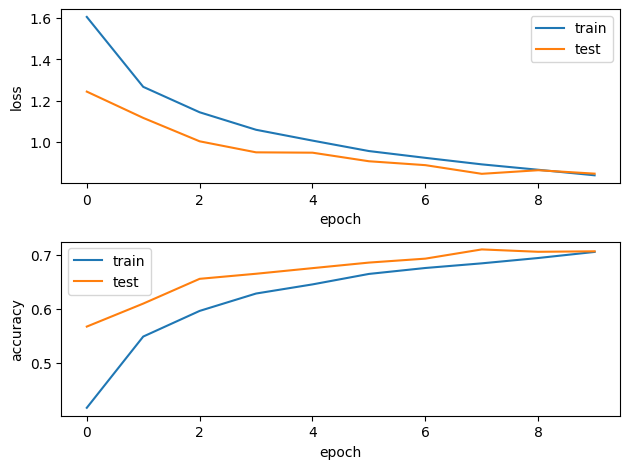

In [27]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.tight_layout()

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8465 - accuracy: 0.7061


[0.8464999198913574, 0.7060999870300293]

In [29]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [30]:
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

In [31]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.88      0.77      0.82      1000
           2       0.65      0.52      0.58      1000
           3       0.55      0.40      0.46      1000
           4       0.67      0.65      0.66      1000
           5       0.56      0.68      0.61      1000
           6       0.73      0.82      0.77      1000
           7       0.75      0.79      0.77      1000
           8       0.82      0.82      0.82      1000
           9       0.72      0.85      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [32]:
cn=confusion_matrix(y_test,y_pred)

Text(0.5, 23.52222222222222, 'Predicted')

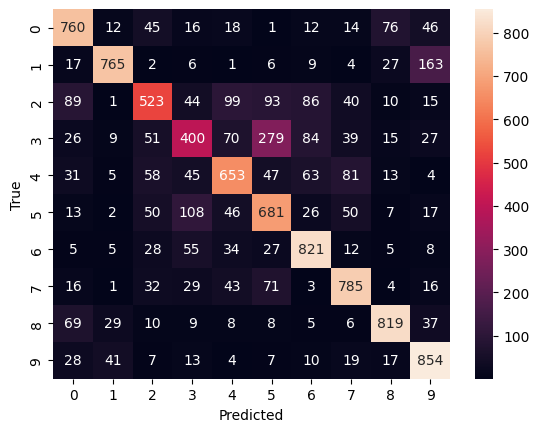

In [33]:
import seaborn as sns
sns.heatmap(cn,annot=True,fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')